**IMPORT LIBRARIES AND LOAD THE DATASET**


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
sns.set(style="whitegrid")

df=pd.read_csv("/content/Sample - Superstore.csv",encoding="latin1")


**DATA CLEANING**


In [3]:
#infromation and null values
print("DATA INFORMATION..\n")
df.info()
print("\nMISSING VALUES:\n\n",df.isnull().sum())


DATA INFORMATION..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   f

In [5]:

df=df.drop_duplicates() #removing duplicates
df.info()
print("\n\nTHERE IS NO DUPLICATES IN THE DATASET!!")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
#converting date columns into datetime datatype
df['Order Date']=pd.to_datetime(df['Order Date'])#order date
df['Ship Date']=pd.to_datetime(df['Ship Date'])#ship date
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

**SUMMARY OF THE DATA**


In [7]:
print("THE SUMMARY OF THE DATASET IS AS FOLLOWS:\n")
df.describe()

THE SUMMARY OF THE DATASET IS AS FOLLOWS:



,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


**EXPLORATORY DATA ANALYSIS**


In [8]:
print("TOTAL SALES:",df['Sales'].sum().round())
print("TOTAL PROFITS:",df['Profit'].sum().round())

print("TOTAL UNITS SOLD:",df['Quantity'].sum())

TOTAL SALES: 2297201.0
TOTAL PROFITS: 286397.0
TOTAL UNITS SOLD: 37873


In [9]:
#sales by region
region_sales=df.groupby('Region')['Sales'].sum().sort_values(ascending=False).round().reset_index()
print("THE TOTAL SALES BY REGION:\n")
print(region_sales)

#sales by catagories
catagory_sales=df.groupby('Category')['Sales'].sum().round().reset_index()
print("\n\nTHE TOTAL SALES BY CATAGORIES:\n")
print(catagory_sales)

#sales over a time(based on year)
time_sales=df.groupby(df['Order Date'].dt.year)['Sales'].sum().round().reset_index()
print("\n\nTHE TOTAL SALES OVER THE YEARS:\n")
print(time_sales)

#profit by sub_catagories
sub_catagory=df.groupby('Sub-Category')['Profit'].sum().round().reset_index()
print('THE TOTAL PROFIT BASED ON SUB_CATAGORY\n:')
print(sub_catagory)


THE TOTAL SALES BY REGION:

    Region     Sales
0     West  725458.0
1     East  678781.0
2  Central  501240.0
3    South  391722.0


THE TOTAL SALES BY CATAGORIES:

          Category     Sales
0        Furniture  742000.0
1  Office Supplies  719047.0
2       Technology  836154.0


THE TOTAL SALES OVER THE YEARS:

   Order Date     Sales
0        2014  484247.0
1        2015  470533.0
2        2016  609206.0
3        2017  733215.0
THE TOTAL PROFIT BASED ON SUB_CATAGORY
:
   Sub-Category   Profit
0   Accessories  41937.0
1    Appliances  18138.0
2           Art   6528.0
3       Binders  30222.0
4     Bookcases  -3473.0
5        Chairs  26590.0
6       Copiers  55618.0
7     Envelopes   6964.0
8     Fasteners    950.0
9   Furnishings  13059.0
10       Labels   5546.0
11     Machines   3385.0
12        Paper  34054.0
13       Phones  44516.0
14      Storage  21279.0
15     Supplies  -1189.0
16       Tables -17725.0


**VIZUALIZATION**
1.   sales by region- bar chart
2.   sales by catagories- bar chart
3.   sales over a time - line plot
4.   profit by sub_catagories - bar chart(using plotly)
5.   correlation - heatmap
6.   profit vs discount - scatter plot
7.   order placed distribution - histogram








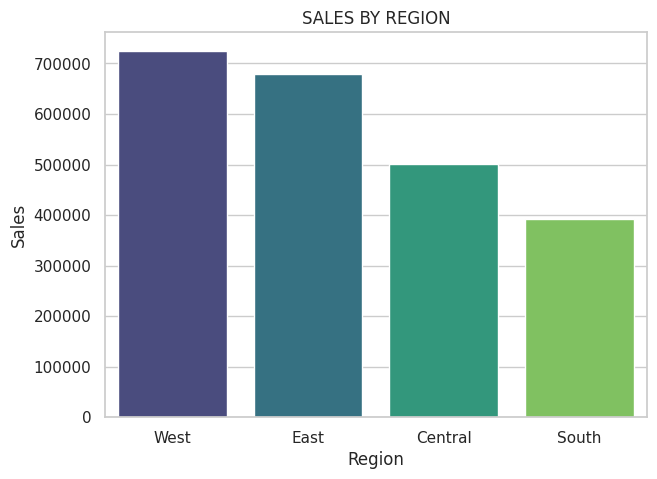

In [10]:
#sales by region
region_sales=df.groupby('Region')['Sales'].sum().sort_values(ascending=False).round().reset_index()
plt.figure(figsize=(7,5))
sns.barplot(data=region_sales,x='Region',y='Sales',palette='viridis',hue='Region')
plt.title('SALES BY REGION')
plt.show()

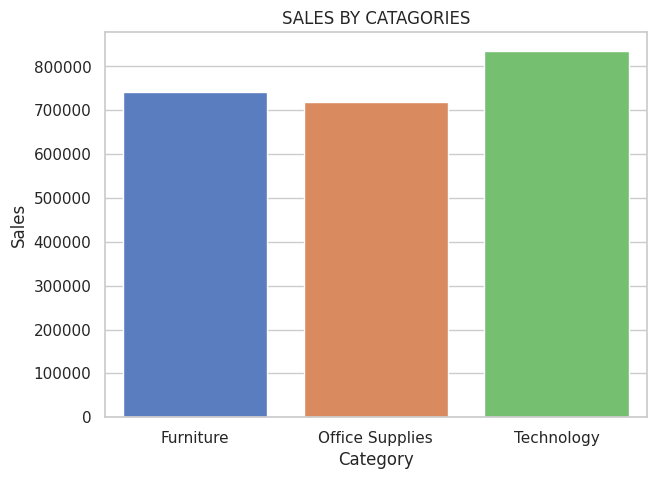

In [12]:
#sales by catagories
catagory_sales=df.groupby('Category')['Sales'].sum().round().reset_index()
plt.figure(figsize=(7,5))
sns.barplot(data=catagory_sales,x='Category',y='Sales',palette="muted",hue="Category")
plt.title('SALES BY CATAGORIES')
plt.show()

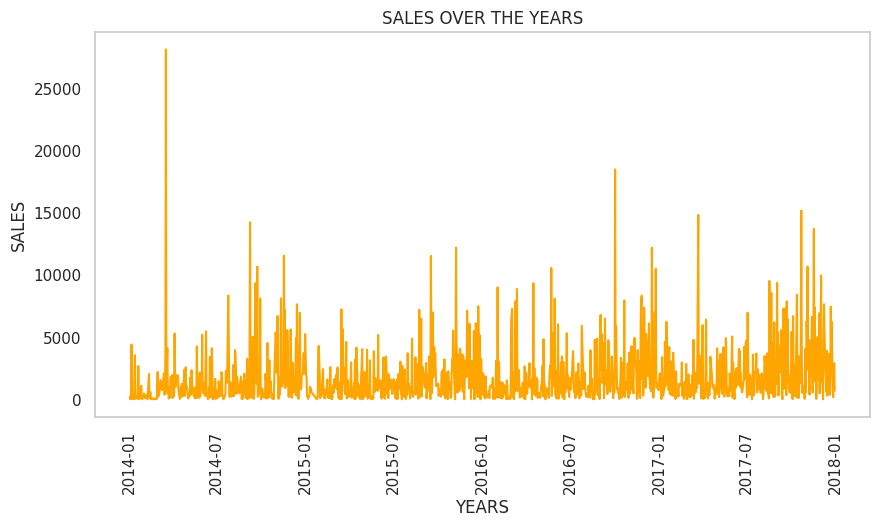

In [11]:
#sales over a time
time_sales=df.groupby(df['Order Date'])['Sales'].sum().round().reset_index()
plt.figure(figsize=(10,5))
plt.plot(time_sales['Order Date'],time_sales['Sales'],c="orange")
plt.grid(False)
plt.title('SALES OVER THE YEARS')
plt.xlabel('YEARS')
plt.xticks(rotation=90)
plt.ylabel('SALES')
plt.show()

In [13]:
#profit by sub_catagories
sub_catagory=df.groupby('Sub-Category')['Profit'].sum().round().reset_index()

fig=px.bar(sub_catagory,x='Sub-Category',y='Profit',color='Profit',title='PROFIT BY SUB_CATAGORY',width=700,height=500)
fig.update_layout(xaxis_tickangle=-45)

fig.show()


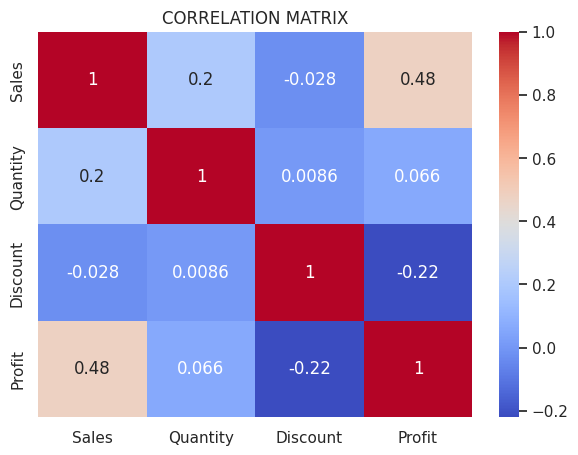

In [14]:
#correlation
plt.figure(figsize=(7,5))
sns.heatmap(df[['Sales','Quantity','Discount','Profit']].corr(),annot=True,cmap='coolwarm')
plt.title('CORRELATION MATRIX')
plt.show()

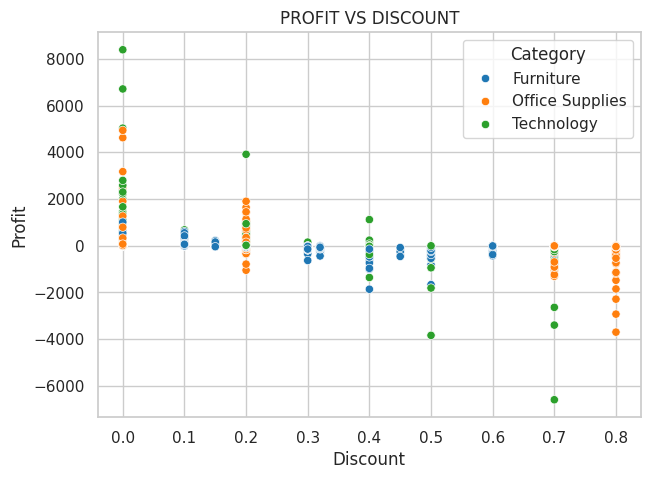

In [15]:
#profit vs discount
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='Discount',y='Profit',hue='Category',palette='tab10')
plt.title('PROFIT VS DISCOUNT')
plt.show()

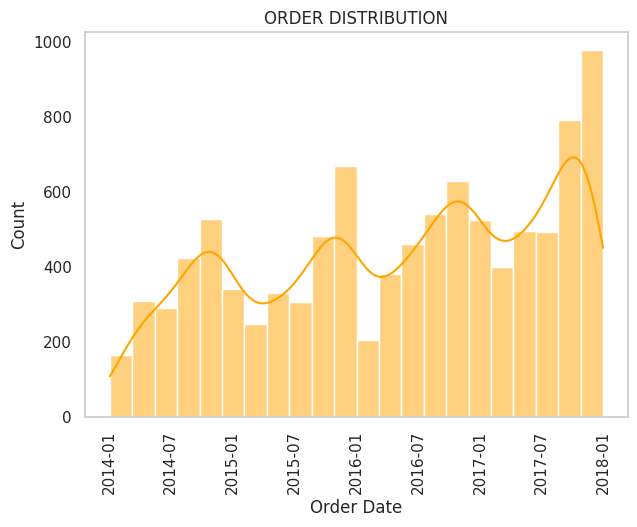

In [20]:
#order distribution
plt.figure(figsize=(7,5))
sns.histplot(data=df,x='Order Date',kde=True,color='orange')
plt.grid(False)
plt.title('ORDER DISTRIBUTION')
plt.xticks(rotation=90)
plt.show()